In [11]:
#importing the libraries

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
#loading the data

In [13]:
train_df=pd.read_csv('F:/Data/trainHP.csv')

In [14]:
test_df=pd.read_csv('F:/Data/testHP.csv')

In [15]:
combine = [train_df, test_df]

In [16]:
#Analyze by describing data

#Checking the column names
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [17]:
#preview the data

In [18]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [20]:
#Getting the Information about the data.

In [21]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [22]:
train_df.select_dtypes('object').head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
train_df.select_dtypes('int64').head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
train_df.select_dtypes('float64').head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0


In [25]:
#Data Description

In [26]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [27]:
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [28]:
#Analyze by pivoting features

#grouping and checking saleprice condition on different variables.

In [29]:
train_df[['YearBuilt', 'SalePrice']].groupby(['YearBuilt'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,YearBuilt,SalePrice
111,2010,394432.000000
109,2008,348849.130435
7,1893,325000.000000
6,1892,291250.000000
90,1989,279500.000000
...,...,...
28,1924,105985.714286
34,1930,103588.888889
1,1875,94000.000000
17,1913,90350.000000


In [30]:
train_df[['OverallQual', 'SalePrice']].groupby(['OverallQual'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [31]:
train_df[['OverallCond', 'SalePrice']].groupby(['OverallCond'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,OverallCond,SalePrice
8,9,216004.545455
4,5,203146.914738
6,7,158145.487805
7,8,155651.736111
5,6,153961.591270
1,2,141986.400000
3,4,120438.438596
2,3,101929.400000
0,1,61000.000000


In [32]:
train_df[['YearRemodAdd', 'SalePrice']].groupby(['YearRemodAdd'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,YearRemodAdd,SalePrice
60,2010,336963.500000
59,2009,284085.391304
58,2008,269709.100000
56,2006,229471.134021
57,2007,224807.250000
...,...,...
32,1982,121271.428571
4,1954,121142.857143
21,1971,120230.555556
0,1950,117463.056180


In [33]:
train_df[['MSSubClass', 'SalePrice']].groupby(['MSSubClass'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,MSSubClass,SalePrice
5,60,239948.501672
11,120,200779.080460
7,75,192437.500000
0,20,185224.811567
8,80,169736.551724
6,70,166772.416667
2,40,156125.000000
9,85,147810.000000
4,50,143302.972222
12,160,138647.380952


In [34]:
train_df[['GrLivArea', 'SalePrice']].groupby(['GrLivArea'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,GrLivArea,SalePrice
857,4316,755000.0
858,4476,745000.0
856,3627,625000.0
772,2364,611657.0
836,2822,582933.0
...,...,...
9,693,52500.0
14,729,52000.0
289,1317,40000.0
0,334,39300.0


In [39]:
numerical = [
  'SalePrice', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr'
]
categorical = [
  'MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold'
]

train_df = train_df[numerical + categorical]
train_df.shape

(1460, 14)

In [ ]:
#Analyze by visualizing data

#plotting using sns

In [40]:
#Analyzing numerical variables

#represented with histogram

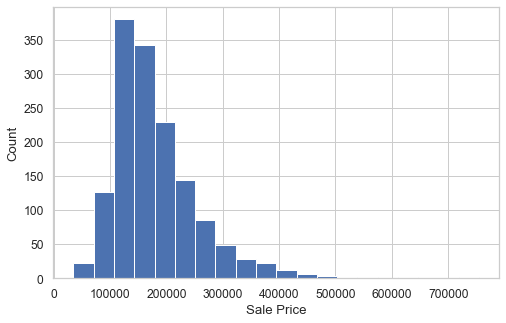

In [46]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train_df['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

In [47]:
#taking a look at the histogram above, we can see that very few houses are priced below 100,000, most of the houses sold between 100,000 and 200,000, and very few houses sold for above 400,000.

In [48]:
#finding for all numerical variables

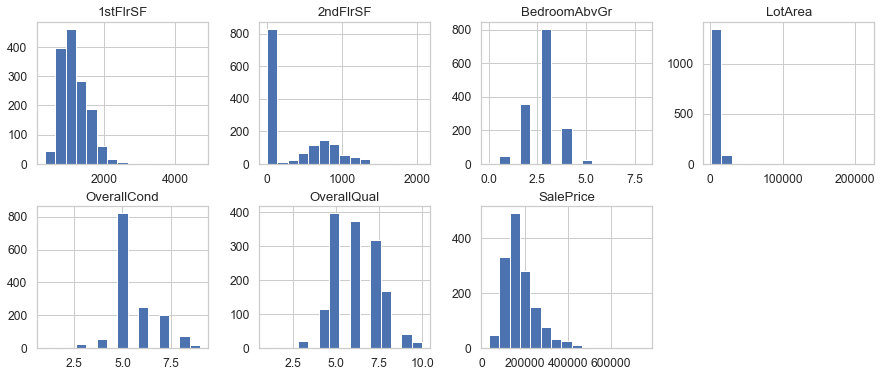

In [49]:
train_df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

In [50]:
#From this visualization above, we get a lot of information. We can see that 1stFlrSF (square footage of the first floor) is heavily skewed right, most houses do not have a second floor, and have 3 BedroomAbvGr (bedrooms above ground). Most houses were sold at an OverallCond of 5 and an OverallQual of 5 or higher. The LotArea visual is more difficult to decipher — however we can tell that there is one or more outliers that may need to be removed before any modeling.

In [53]:
#Analyzing categorical variables

#represented with bar plots

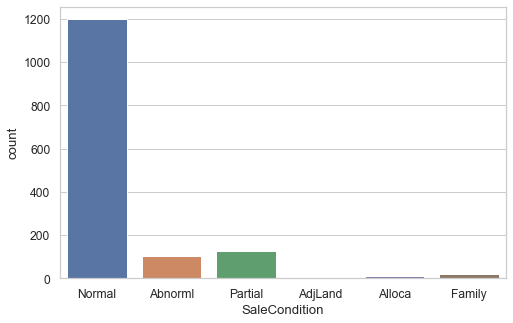

In [54]:
sns.countplot(train_df['SaleCondition']);

In [55]:
#From the visualization above, we can easily see that most houses were sold in Normal condition, and very few were sold in AjdLand (adjoining land purchase), Alloca (allocation: two linked properties with separate deeds), and Family (sale between family members) conditions

In [56]:
#finding for all categorical variables

#we create subplots with a grid of 2 rows and 4 columns.

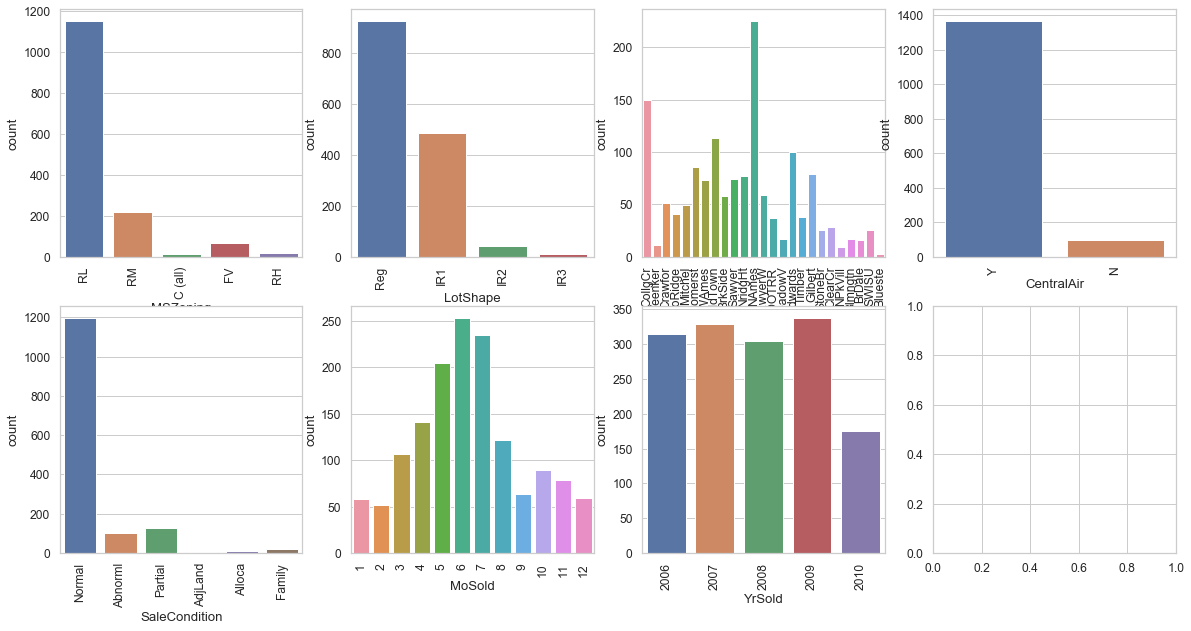

In [57]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(train_df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [59]:
#most houses have RL (Residential Low Density) zoning classification, have Regular lot shape, and have CentralAir. We can also see that houses were sold more frequently during the summer months, the most houses were sold in the NAmes (North Ames) neighborhood, and there was a dip in sale in 2010.

In [60]:
#Analyzing Relationships Between Numerical Variables

#it allows us to easily get a visual understanding of patterns and correlations.

#The scatter plot is often used for visualizing relationships between two numerical variables.


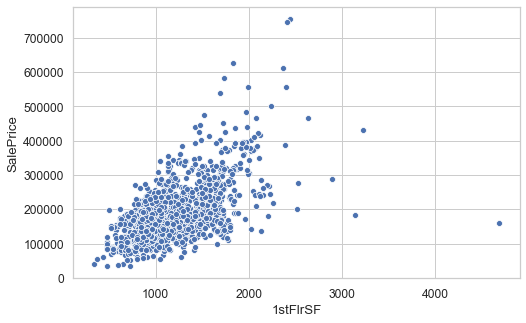

In [61]:
sns.scatterplot(x=train_df['1stFlrSF'], y=train_df['SalePrice']);

In [62]:
#from above, the larger the first floor of a house, the higher the likely sale price.

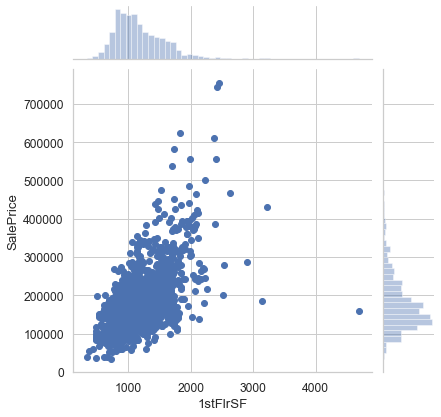

In [63]:
#by using joint plot or marginal plot
sns.jointplot(x=train_df['1stFlrSF'], y=train_df['SalePrice']);

In [64]:
#Analyzing Relationships Between Numerical and Categorical Variables

#The box-and-whisker plot is used for visualizing relationships between numerical variables and categorical variables

#complex conditional plots are used to visualize conditional relationships

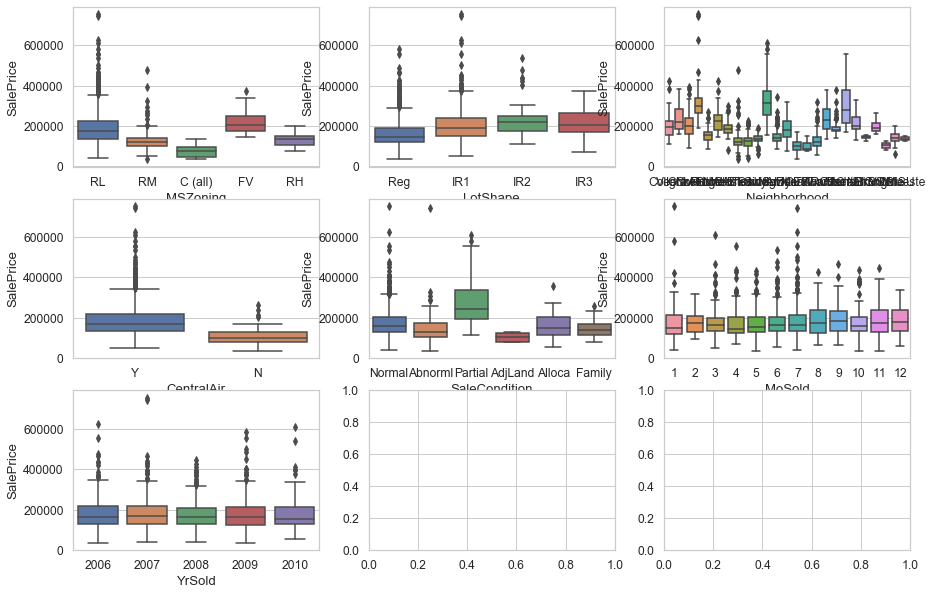

In [65]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=train_df, ax=subplot)

In [66]:
#From above, we can see that houses with FV (Floating Village Residential) zoning classification have a higher average SalePrice than other zoning classifications, as do houses with CentralAir, and houses with a Partial (home not completed when last assessed) SaleCondition. We can also see that there is little variance in average SalePrice between houses with different LotShapes, or between MoSold and YrSold.

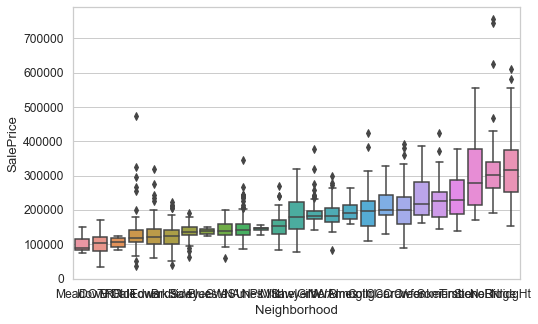

In [67]:
sorted_nb = train_df.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=train_df['Neighborhood'], y=train_df['SalePrice'], order=list(sorted_nb.index))

In [68]:
#From above, We can see that in the cheapest neighborhoods houses sell for a median price of around $100,000, and in the most expensive neighborhoods houses sell for around $300,000. We can also see that for some neighborhoods, dispersion between the prices is very low, meaning that all the prices are close to each other.

In [69]:
#create plots that show conditional relationships. For example, if we are conditioning on the Neighborhood, using the FacetGrid function we can visualize a scatter plot between the OverallQual and the SalePrice variables:

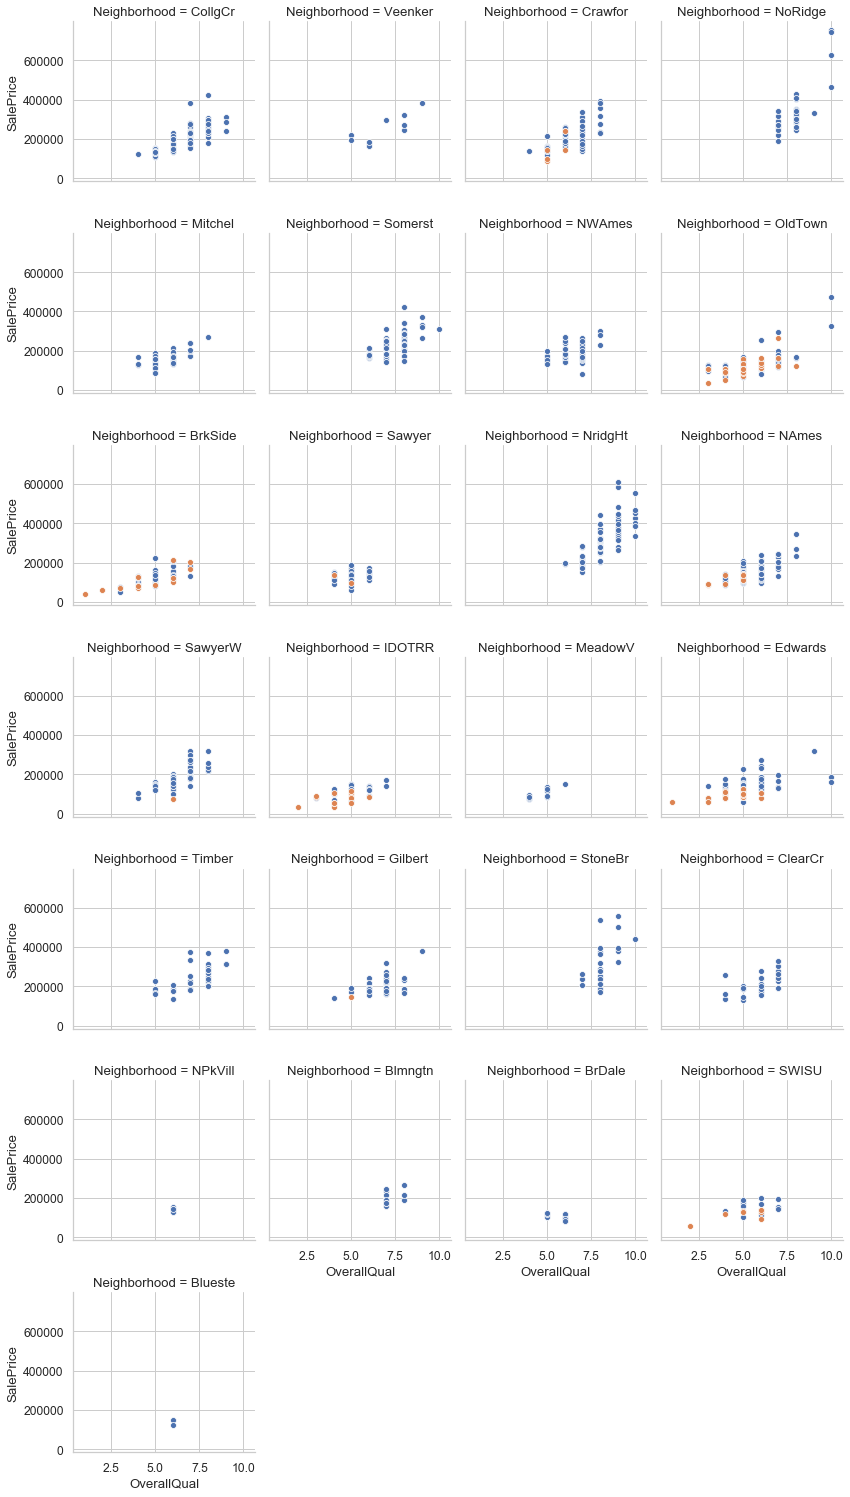

In [70]:
cond_plot = sns.FacetGrid(data=train_df, col='Neighborhood', hue='CentralAir', col_wrap=4)
cond_plot.map(sns.scatterplot, 'OverallQual', 'SalePrice');

In [71]:
#From above, for each individual neighborhood we can see the relationship between OverallQual and SalePrice.

In [72]:
#We also added another categorical variable CentralAir to the (optional) hue parameter — the orange points correspond to houses that do not have CentralAir. 
#As you can see, these houses tend to sell at a lower price.

In [81]:
#wrangle data

In [82]:
#Correcting by dropping features

In [86]:
train_df = train_df.drop(['LotArea', '2ndFlrSF','BedroomAbvGr','MSZoning','LotShape','MoSold','YrSold'], axis=1)

In [88]:
test_df = test_df.drop(['LotArea', '2ndFlrSF','BedroomAbvGr','MSZoning','LotShape','MoSold','YrSold'], axis=1)

In [122]:
#converting columns of string values to numerical 

In [120]:
def tran_mathscore(x):
    if x == 'Y':
        return 1
    if x == 'N':
        return 0

In [121]:
train_df['CentralAir'] = train_df['CentralAir'].apply(tran_mathscore)
train_df

,SalePrice,OverallQual,OverallCond,1stFlrSF,Neighborhood,CentralAir,SaleCondition
0,208500,7,5,856,CollgCr,1,None
1,181500,6,8,1262,Veenker,1,None
2,223500,7,5,920,CollgCr,1,None
3,140000,7,5,961,Crawfor,1,None
4,250000,8,5,1145,NoRidge,1,None
...,...,...,...,...,...,...,...
1455,175000,6,5,953,Gilbert,1,None
1456,210000,6,6,2073,NWAmes,1,None
1457,266500,7,9,1188,Crawfor,1,None
1458,142125,5,6,1078,NAmes,1,None


In [125]:
train_df = train_df.drop(['SaleCondition'], axis=1)
test_df=test_df.drop(['SaleCondition'], axis=1)

In [128]:
#converting string to numerical using label encoder
from sklearn.preprocessing import LabelEncoder
train_df['Neighbourhood']=LabelEncoder().fit_transform(train_df.Neighborhood)

In [129]:
train_df

,SalePrice,OverallQual,OverallCond,1stFlrSF,Neighborhood,CentralAir,Neighbourhood
0,208500,7,5,856,CollgCr,1,5
1,181500,6,8,1262,Veenker,1,24
2,223500,7,5,920,CollgCr,1,5
3,140000,7,5,961,Crawfor,1,6
4,250000,8,5,1145,NoRidge,1,15
...,...,...,...,...,...,...,...
1455,175000,6,5,953,Gilbert,1,8
1456,210000,6,6,2073,NWAmes,1,14
1457,266500,7,9,1188,Crawfor,1,6
1458,142125,5,6,1078,NAmes,1,12


In [130]:
train_df = train_df.drop(['Neighborhood'], axis=1)
test_df=test_df.drop(['Neighborhood'], axis=1)

In [138]:
#test dataset

In [139]:
test_df.head(10)

,SalePrice,OverallQual,OverallCond,1stFlrSF,CentralAir,Neighbourhood
0,208500,7,5,856,1,5
1,181500,6,8,1262,1,24
2,223500,7,5,920,1,5
3,140000,7,5,961,1,6
4,250000,8,5,1145,1,15
5,143000,5,5,796,1,11
6,307000,8,5,1694,1,21
7,200000,7,6,1107,1,14
8,129900,7,5,1022,1,17
9,118000,5,6,1077,1,3


In [140]:
#Model, predict and solve

In [141]:
X_train = train_df.drop("SalePrice", axis=1)
Y_train = train_df["SalePrice"]
X_test  = test_df.drop("OverallCond", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1460, 5), (1460,), (1460, 5))

In [142]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


3.49

In [143]:
#We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. 
#Positive coefficients increase the log-odds of the response (and thus increase the probability) and vice versa

coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,1stFlrSF,-0.004428
4,Neighbourhood,-0.034151
1,OverallCond,-0.078366
0,OverallQual,-0.366717
3,CentralAir,-0.603828


In [144]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


82.67

In [145]:
#k-Nearest Neighbors algorithm(KNN)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

32.53

In [146]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

34.73

In [147]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

0.68

In [148]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.14

In [149]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

0.07

In [150]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

95.0

In [151]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.0

In [152]:
#Model evaluation

In [153]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,95.00
8,Decision Tree,95.00
0,Support Vector Machines,82.67
4,Naive Bayes,34.73
1,KNN,32.53
2,Logistic Regression,3.49
5,Perceptron,0.68
7,Linear SVC,0.14
6,Stochastic Gradient Decent,0.07
